# Crazy Corporation Credit Fraud detection
Below we are going to start the preprocessing of data and implementation of a Logical regression model.

## Imported libraries
Below is the libraries necessary for this project. This is ran in a virtual environment sperate from system environments.

In [186]:
#importation of libraries needed for the project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Data importation and preprocessing
This section will be dedicated to data importation and preprocessing. 

In [187]:
#import csv with data into a pandas DataFrame
df = pd.read_csv("./src/testdata/creditcard.csv")
df.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Time is an irrelavent factor due to each being subsequent transactions that occur cronoligically. v1-v28 is scaled and amount is not. Class is our classification variable. It will denote fraud by a 1 and non-fraud by a 0. This means that the logistic regression model will be binomial.

In [188]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


So descriptions of the data including means, quartile values, mins, maxes, and standard deviations.

Below there is a check for null values amongst the data.

In [189]:
print(f"Number of null cells: {df.isnull().sum().max()}")

Number of null cells: 0


No NULL values are present in the dataset. No need for a section handling that type of data.

Checking the dataset for the percentages of each class. In this case which transactions are non-fraud (0) and fraud (1).

In [190]:
print(f"Not Fraud percent:{round(df['Class'].value_counts()[0]/len(df) * 100 ,2)}")
print(f"Fraud percent:{round(df['Class'].value_counts()[1]/len(df) * 100 ,2)}")

Not Fraud percent:99.83
Fraud percent:0.17


Extreme disparity between each type of transaction. This will require a random undersampling of non-fraud data to resolve this imbalance. 

Visualize the difference in actual volume using a count plot. Red is 0, or non-fraud, and 1 is fraud.

<Axes: xlabel='Class', ylabel='count'>

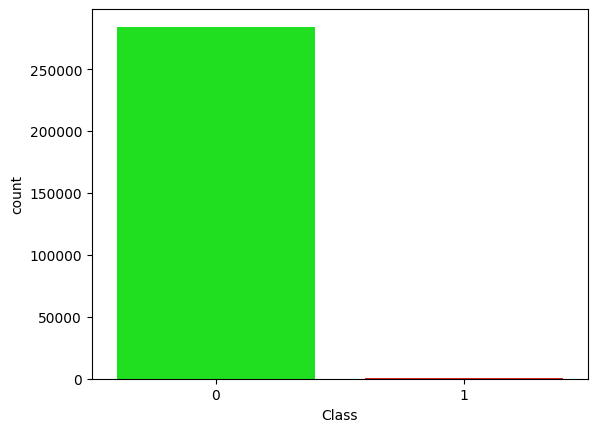

In [191]:
colors = ["#00FF00", "#FF0000"]

sns.countplot( x=df['Class'],data=df, palette=colors)

Ammount needs to be scaled and based on data information above a Robust Scaler would be the best option for scaling.

In [192]:
from sklearn.preprocessing import RobustScaler

#scaling amount so it is on a similar scale
ammount = df["Amount"]
df.drop("Amount", axis=1, inplace=True)
df["scaled_amount"] = RobustScaler().fit_transform(ammount.values.reshape(-1,1))
scaled_amount = df["scaled_amount"]
df.drop("scaled_amount", axis=1, inplace=True)
df.insert(1, "scaled_amount", scaled_amount)
df.head()

,Time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.0,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,0.0,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.0,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.0,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,2.0,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


After scaling the data we can use a heatmap to see if there are any correlation between the features (barring time)

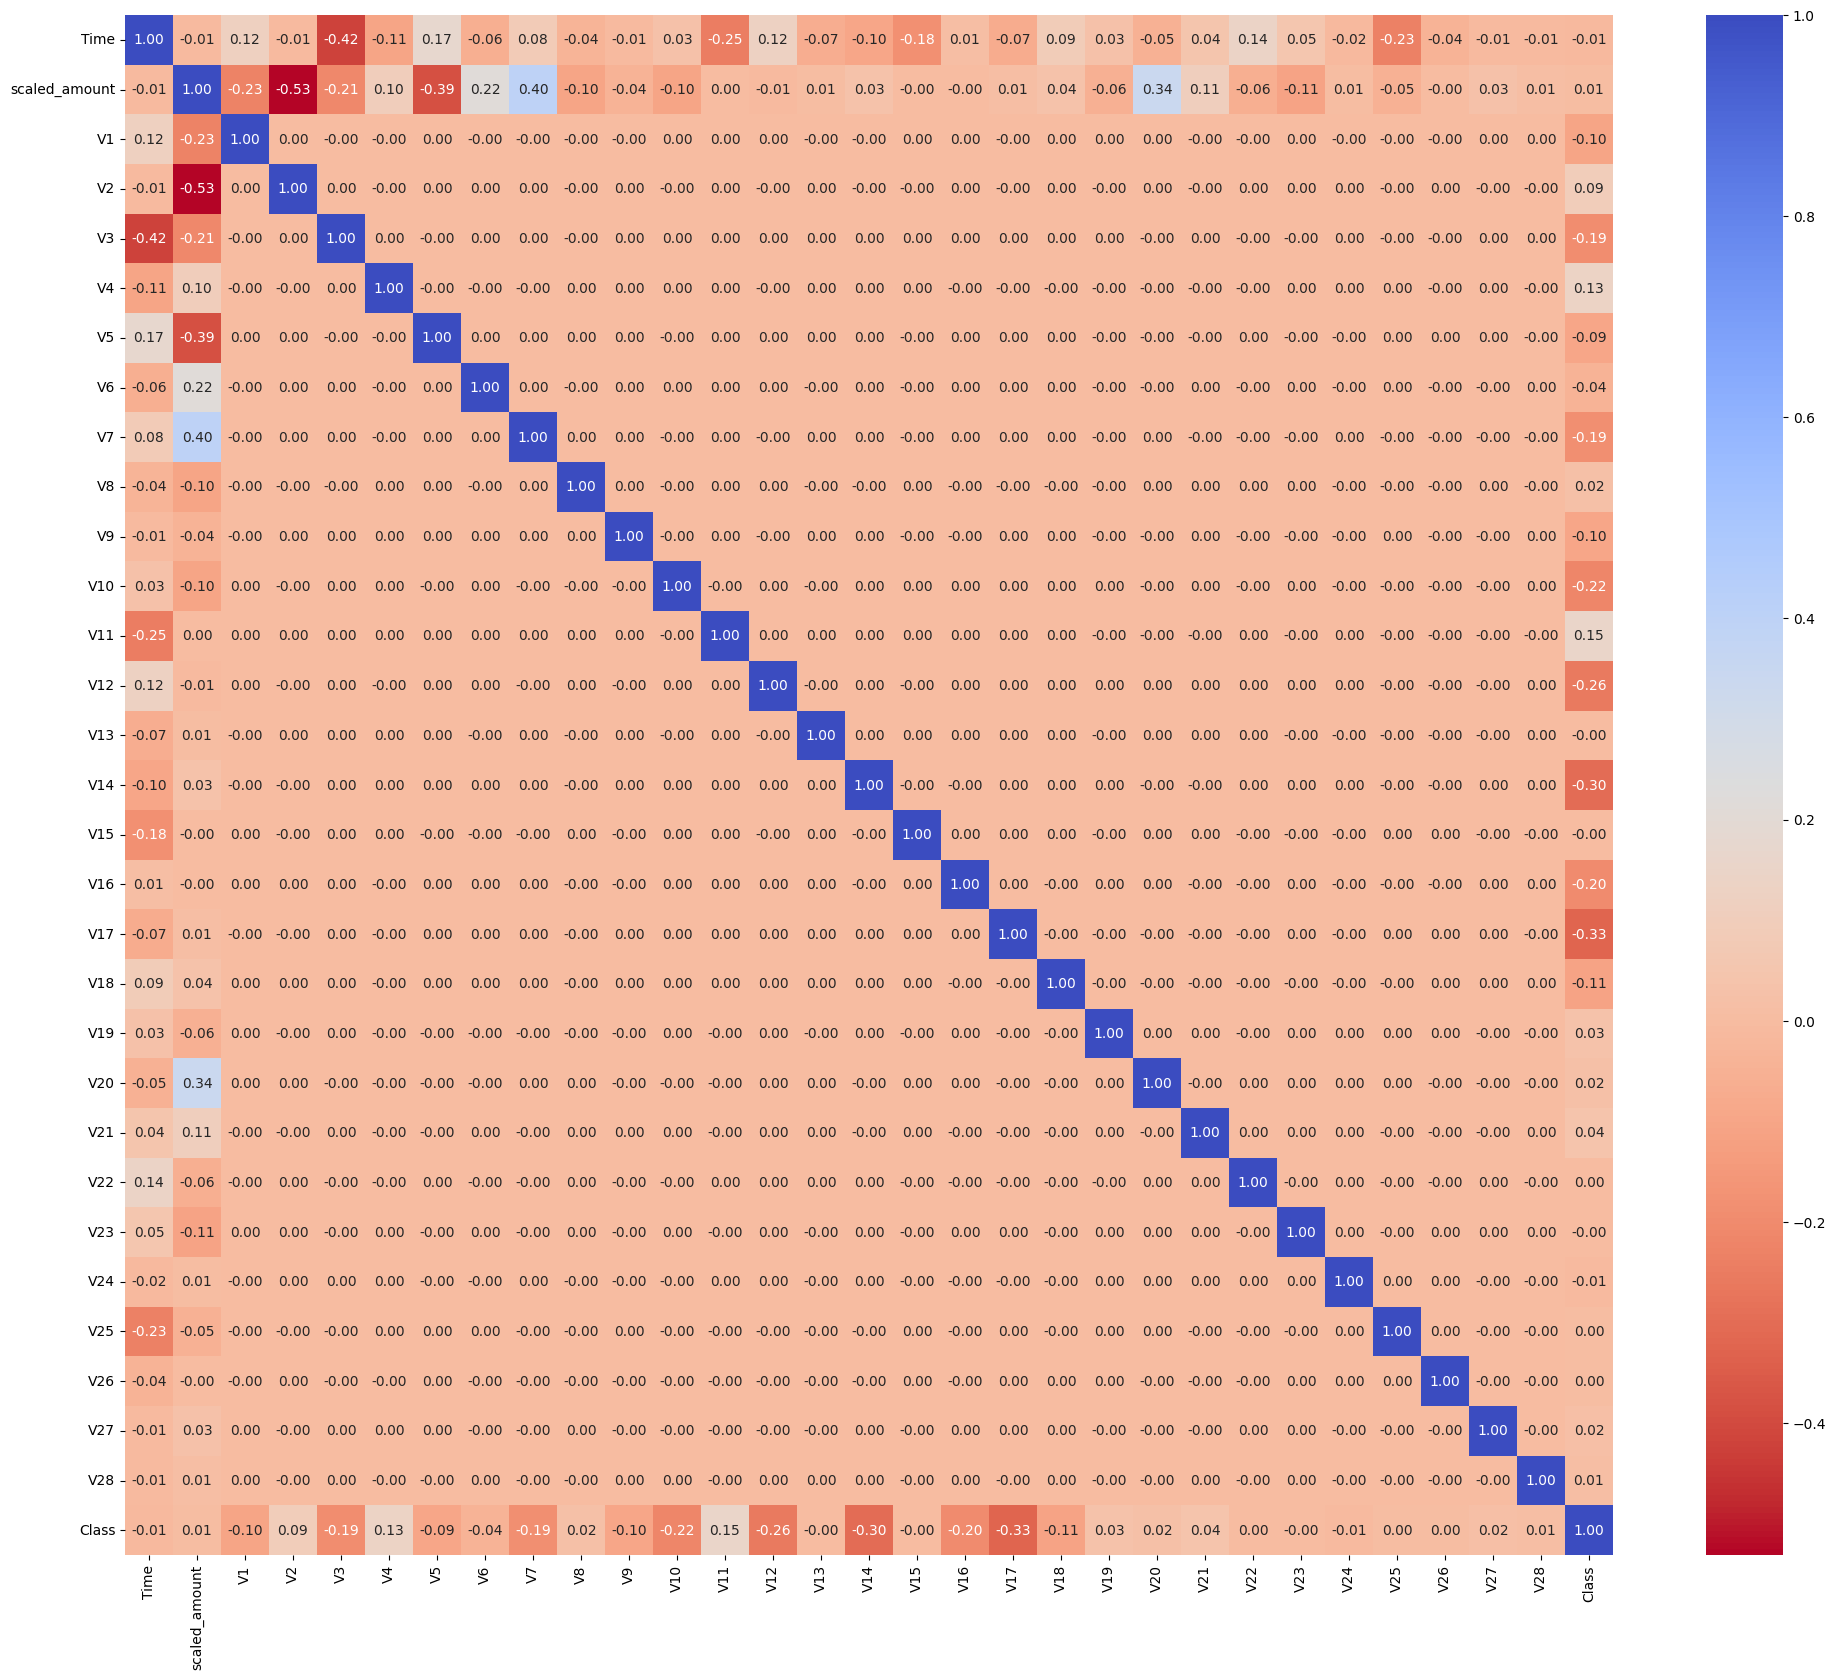

In [193]:
#Heatmap of the unbalanced data post scaling
f, ax1 = plt.subplots(figsize=(24,20))
correlation = df.corr()
sns.heatmap(correlation, cmap='coolwarm_r',ax=ax1,  fmt=".2f", annot=True)
plt.show()

## Balancing data

In [194]:
#sample dataframe for 100% of data 
df = df.sample(frac=1)

#create seperate dataframe for both fraud and non-fraud (Limited to the same size as fraud)
df_fraud = df.loc[df["Class"] == 1]
df_not_fraud = df.loc[df["Class"] == 0][:len(df_fraud)]

#Concatenating data and resampling using an arbitrary randome seed (in this case 67) 
df_balanced_unshuffled = pd.concat([df_fraud,df_not_fraud])
df_balanced_shuffled = df_balanced_unshuffled.sample(frac=1,random_state=67)

#Display new dataframe
df_balanced_shuffled.head(20)

,Time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
178140,123495.0,-0.293440,1.841579,-0.413636,-0.561929,0.919954,0.238209,1.534607,-0.915566,0.615131,...,-0.405125,0.297839,1.040334,0.151296,-1.681863,-0.290128,-0.444817,0.094863,-0.060682,0
4105,3742.0,-0.165863,1.462846,-0.582219,-0.879407,-1.642192,1.489665,3.263292,-1.212620,0.718617,...,0.157231,-0.297398,-0.881458,0.109301,0.918388,0.368718,-0.504986,-0.013916,0.009898,0
79550,58073.0,-0.287012,-1.086691,1.323980,-0.114272,-1.540331,0.177328,-0.050173,-0.080420,0.905359,...,-0.194591,-0.030978,-0.282343,-0.107209,-1.267123,-0.047477,0.873164,-0.184438,-0.055194,0
126833,78118.0,-0.182631,-0.724541,1.109251,1.545635,-0.388210,0.335359,-0.369694,0.964212,-0.307247,...,0.502563,-0.365265,-0.551203,-0.125388,-0.028103,-0.134892,0.027187,0.142209,-0.204470,0
244580,152409.0,13.665898,0.170683,-3.710503,-2.096597,-0.407806,-0.963563,0.656929,0.674180,-0.165032,...,2.001428,0.414373,-0.966663,-0.587737,-0.259156,-0.839130,0.237477,-0.229734,0.115499,0
9509,14152.0,-0.293440,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,...,1.434240,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1
271797,164751.0,-0.239503,0.072567,0.777994,-0.117858,-0.939047,0.941761,-0.215575,0.886990,0.011389,...,-0.000108,-0.276642,-0.657219,-0.063904,-1.047695,-0.387151,0.184435,0.240702,0.076676,0
67259,52438.0,0.251380,-0.762333,0.938143,1.221864,-0.976315,1.012611,0.019664,1.153083,0.030741,...,-0.083440,0.042070,-0.026832,-0.324573,-0.853501,0.419315,-0.711904,0.056522,0.091785,0
255851,157430.0,0.809753,1.877741,-0.557850,-0.623738,0.104855,-0.492192,-0.396256,-0.356316,-0.055758,...,-0.020842,-0.202901,-0.643031,0.372044,0.707566,-0.506823,-0.366541,-0.013033,-0.017201,0
192584,129764.0,4.758611,-2.434004,3.225947,-6.596282,3.593161,-1.079452,-1.739741,-0.047420,0.301424,...,-0.280533,-0.035491,-0.419178,0.157436,-0.714849,0.468859,-0.348522,0.420036,-0.327643,1


## 

<Axes: xlabel='Class', ylabel='count'>

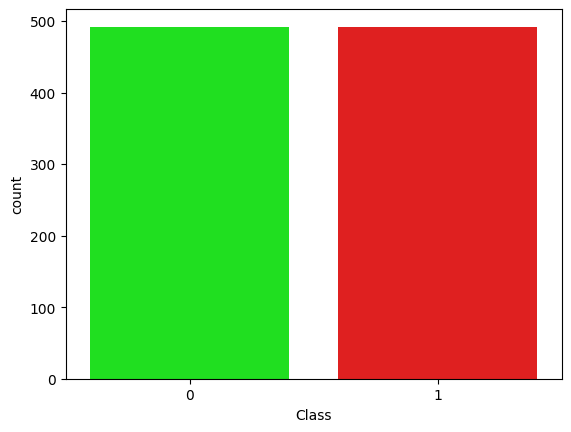

In [195]:
#Colors associated with different classes
colors = ["#00FF00", "#FF0000"]

#countplot that displays balanced data counts based on class
sns.countplot( x=df_balanced_shuffled['Class'],data=df_balanced_shuffled, palette=colors)

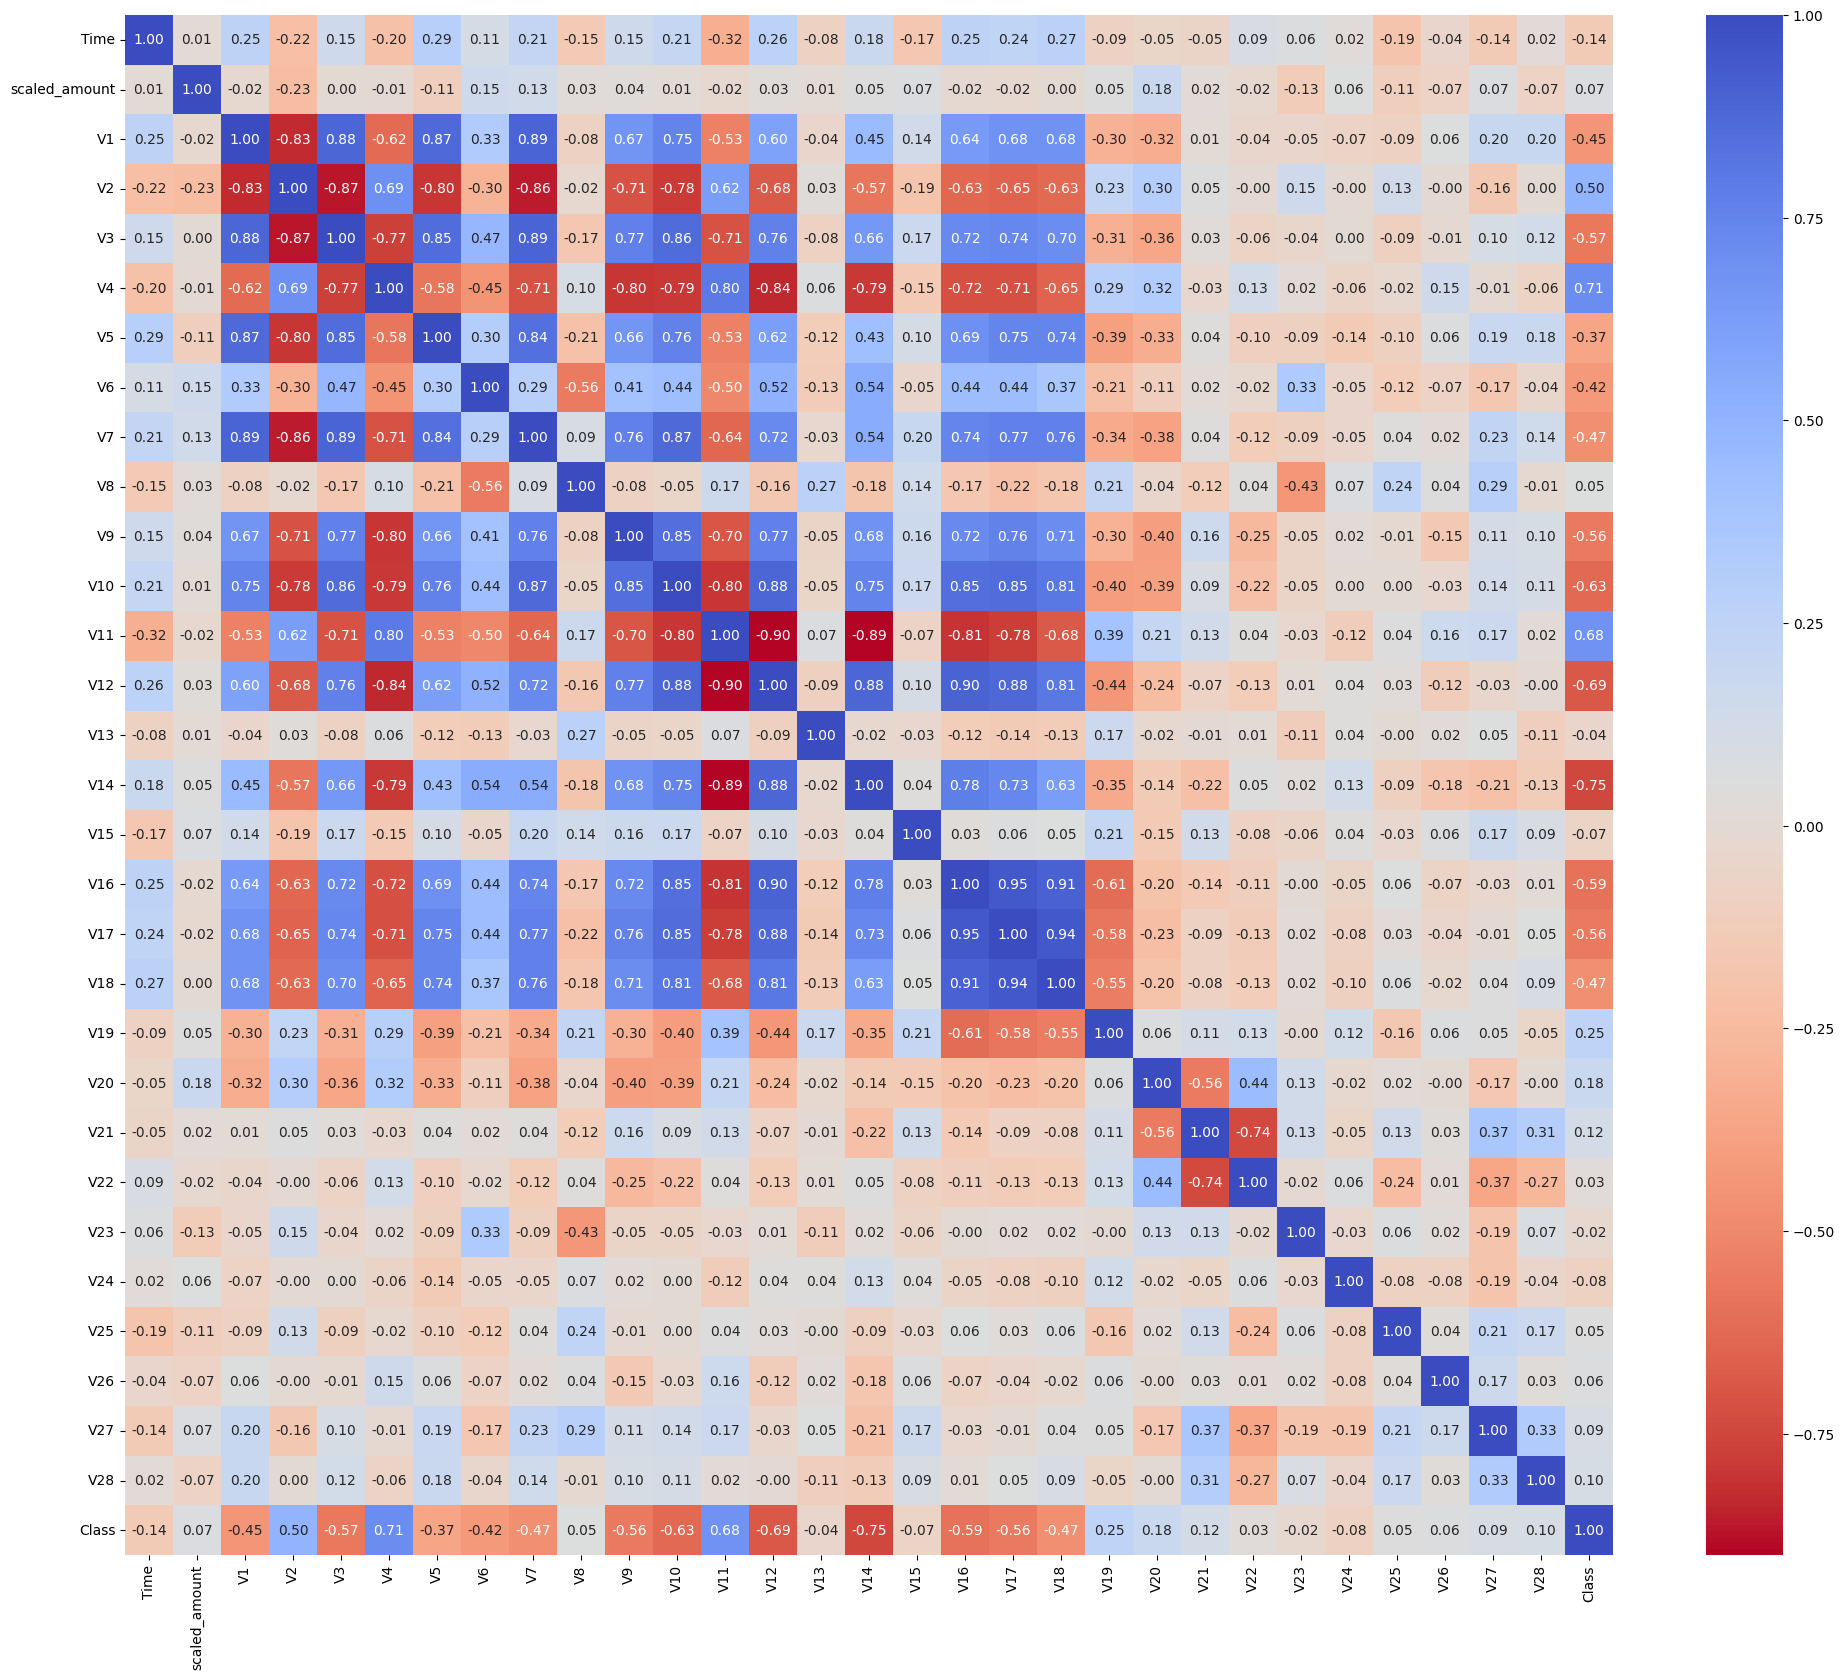

In [196]:
#Heatmap of balanced data
fig, ax1 = plt.subplots(figsize=(24,20))
correlation = df_balanced_shuffled.corr()
sns.heatmap(correlation, cmap='coolwarm_r',ax=ax1, fmt=".2f", annot=True)
plt.show()

There is a negative correlation between Class (Classifier) and v14, v12, v16, v10 and a positive correlation for features v4, v11, v2

negative correlations:

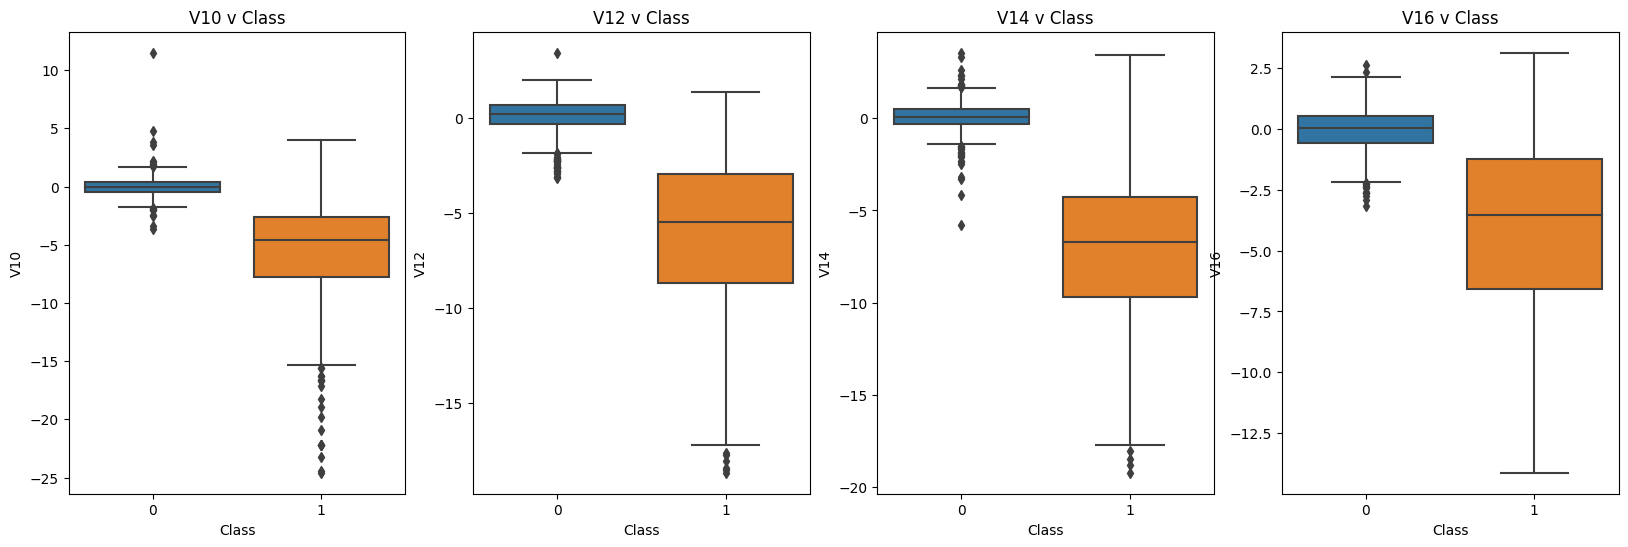

In [197]:
#Figure and number of slots
fig, axes = plt.subplots(ncols=4, figsize=(20,6))

#V10 boxplot
sns.boxplot(x="Class", y="V10", data=df_balanced_shuffled, ax=axes[0])
axes[0].set_title("V10 v Class")

#V12 boxplot
sns.boxplot(x="Class", y="V12", data=df_balanced_shuffled, ax=axes[1])
axes[1].set_title("V12 v Class")

#V14 boxplot
sns.boxplot(x="Class", y="V14", data=df_balanced_shuffled, ax=axes[2])
axes[2].set_title("V14 v Class")

#V16 Boxplot
sns.boxplot(x="Class", y="V16", data=df_balanced_shuffled, ax=axes[3])
axes[3].set_title("V16 v Class")


plt.show()

Positive Correlations:

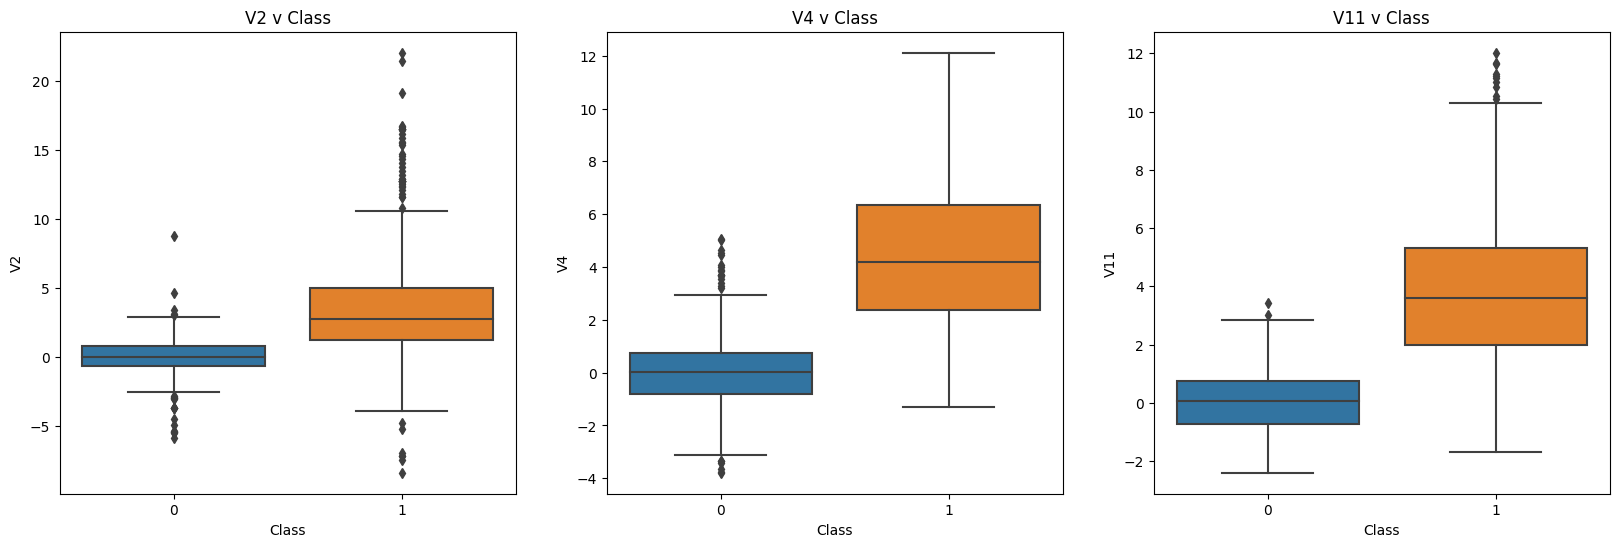

In [198]:
#Figure and number of slots
fig, axes = plt.subplots(ncols=3, figsize=(20,6))

#V2 boxplot
sns.boxplot(x="Class", y="V2", data=df_balanced_shuffled, ax=axes[0])
axes[0].set_title("V2 v Class")

#V4 boxplot
sns.boxplot(x="Class", y="V4", data=df_balanced_shuffled, ax=axes[1])
axes[1].set_title("V4 v Class")

#V11 boxplot
sns.boxplot(x="Class", y="V11", data=df_balanced_shuffled, ax=axes[2])
axes[2].set_title("V11 v Class")

#showing figure
plt.show()

Above you can see the outliers above adn below the quartile ranges. Now we must consider purging these outliers.

c:\Users\andre\Documents\WGU\Capstone\Task 2\jupyter_application\C964-CS-Capstone-2\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\andre\Documents\WGU\Capstone\Task 2\jupyter_application\C964-CS-Capstone-2\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\andre\Documents\WGU\Capstone\Task 2\jupyter_application\C964-CS-Capstone-2\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\andre\Documents\WGU\Capstone\Task 2\jupyter_application\C964-CS-Capstone-2\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


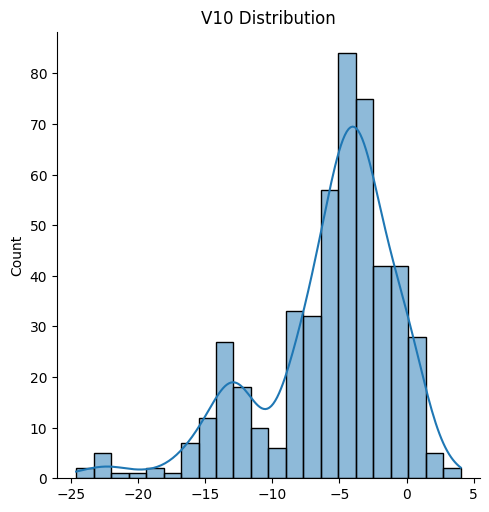

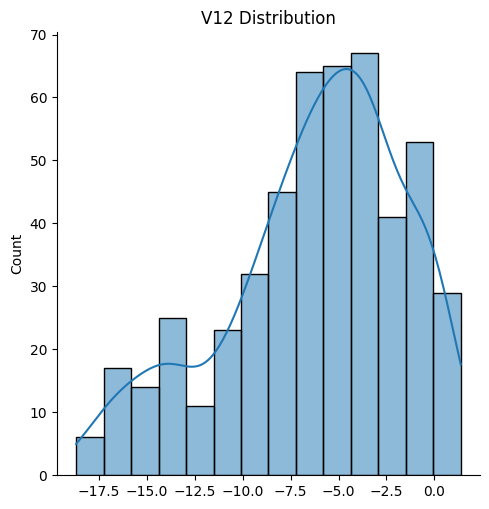

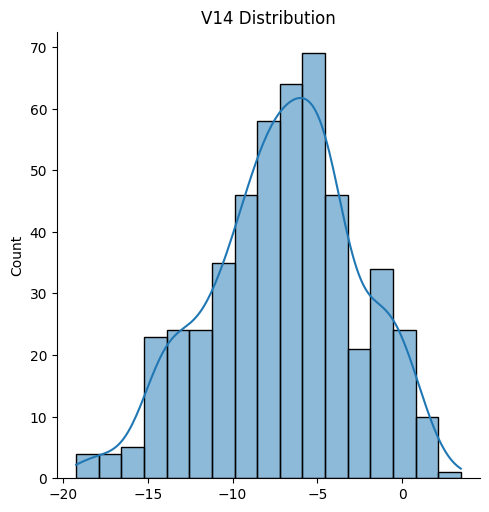

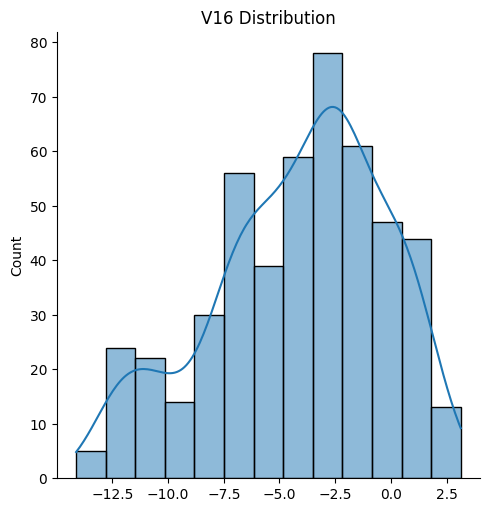

In [210]:
#Values of different negative correlation features where fraud occurs
v10_dist = df_balanced_shuffled["V10"].loc[df_balanced_shuffled["Class"] == 1].values
v12_dist = df_balanced_shuffled["V12"].loc[df_balanced_shuffled["Class"] == 1].values
v14_dist = df_balanced_shuffled["V14"].loc[df_balanced_shuffled["Class"] == 1].values
v16_dist = df_balanced_shuffled["V16"].loc[df_balanced_shuffled["Class"] == 1].values

#set plots
sns.displot(v10_dist, kde=True).set(title="V10 Distribution")

sns.displot(v12_dist, kde=True).set(title="V12 Distribution")

sns.displot(v14_dist, kde=True).set(title="V14 Distribution")

sns.displot(v16_dist, kde=True).set(title="V16 Distribution")


c:\Users\andre\Documents\WGU\Capstone\Task 2\jupyter_application\C964-CS-Capstone-2\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\andre\Documents\WGU\Capstone\Task 2\jupyter_application\C964-CS-Capstone-2\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\andre\Documents\WGU\Capstone\Task 2\jupyter_application\C964-CS-Capstone-2\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


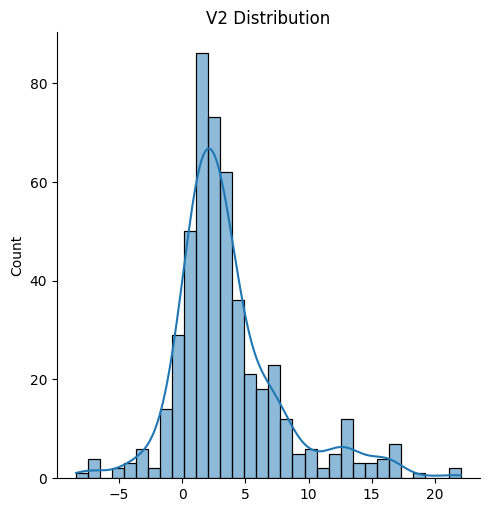

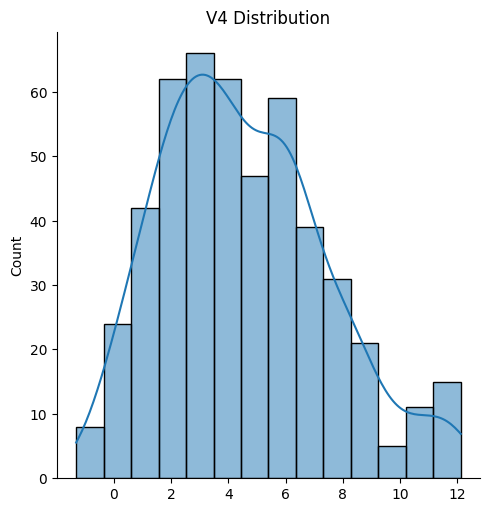

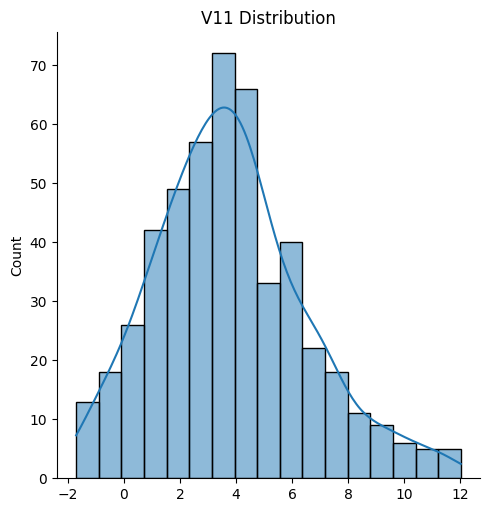

In [211]:
#Values of different negative correlation features where fraud occurs
v2_dist = df_balanced_shuffled["V2"].loc[df_balanced_shuffled["Class"] == 1].values
v4_dist = df_balanced_shuffled["V4"].loc[df_balanced_shuffled["Class"] == 1].values
v11_dist = df_balanced_shuffled["V11"].loc[df_balanced_shuffled["Class"] == 1].values

#set plots
sns.displot(v2_dist, kde=True).set(title="V2 Distribution")

sns.displot(v4_dist, kde=True).set(title="V4 Distribution")

sns.displot(v11_dist, kde=True).set(title="V11 Distribution")


Based on review of distributions compared to a normal distribution. I have determined that anomolies are not extreme.

In [212]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

x = df_balanced_shuffled.drop("Class", axis=1)
y = df_balanced_shuffled["Class"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state=67)

x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

logistic_regresion_model = LogisticRegression()
logistic_regresion_model.fit(x_train, y_train)

train_score = cross_val_score(logistic_regresion_model, x_train, y_train, cv=5)
print(f"Training Score: {round(train_score.mean(), 2)*100}%")

Training Score: 93.0%


Training score based on balanced data is at 93% accuracy.
Finding the most impactful parameters is needed.